In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import requests 
from StringIO import StringIO
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations

In [269]:
exprs = pd.read_csv('https://raw.githubusercontent.com/cs109/2014_data/master/exprs_GSE5859.csv',index_col = 0)
sampleinfo = pd.read_csv('https://raw.githubusercontent.com/cs109/2014_data/master/sampleinfo_GSE5859.csv')

In [270]:
ind = list([])
for i in np.arange(len(sampleinfo.filename)):
    ind_i = list(exprs.columns == sampleinfo.filename[i]).index(True)
    ind.append(ind_i)

In [271]:
exprs = exprs[ind]

In [280]:
exprs.head()

,GSM25349.CEL.gz,GSM25350.CEL.gz,GSM25356.CEL.gz,GSM25357.CEL.gz,GSM25358.CEL.gz,GSM25359.CEL.gz,GSM25360.CEL.gz,GSM25361.CEL.gz,GSM25377.CEL.gz,GSM25378.CEL.gz,...,GSM136719.CEL.gz,GSM136720.CEL.gz,GSM136721.CEL.gz,GSM136722.CEL.gz,GSM136723.CEL.gz,GSM136724.CEL.gz,GSM136725.CEL.gz,GSM136726.CEL.gz,GSM136727.CEL.gz,GSM136729.CEL.gz
1007_s_at,6.627014,6.249807,5.934128,6.145268,6.091270,6.041186,6.050375,6.063847,6.226106,6.358282,...,6.466445,6.533592,6.631492,6.513362,6.440706,6.704324,6.488579,6.809481,6.133068,6.155473
1053_at,6.939184,6.818038,7.047962,7.422477,7.272361,7.128216,6.750719,6.836287,6.738022,7.367895,...,7.032885,7.156344,7.018025,6.973322,6.884738,7.120898,7.517410,7.200596,7.280781,7.111583
117_at,5.113570,5.074096,5.371201,5.266550,5.342047,5.063876,5.315898,5.483652,6.689444,6.482782,...,5.661112,5.127260,5.151840,5.505602,5.687689,4.942651,5.247190,5.237239,5.401876,5.302628
121_at,7.833862,7.780682,7.458197,7.655948,7.546555,7.072670,7.092984,6.954225,7.489785,7.388539,...,7.769734,7.815864,7.683279,7.883231,7.913621,7.834196,7.331864,7.357102,7.607461,7.456453
1255_g_at,3.152269,3.111747,3.018932,3.154545,3.107954,3.224284,3.114241,3.044975,3.304038,2.887919,...,3.257484,3.339234,3.298384,3.150654,3.344501,3.230285,3.175846,3.105092,3.225123,3.090149


In [281]:
sampleinfo.head()

,ethnicity,date,filename,sex,elapsedInDays
0,CEU,2003-02-04,GSM25349.CEL.gz,M,96 days
1,CEU,2003-02-04,GSM25350.CEL.gz,M,96 days
2,CEU,2002-12-17,GSM25356.CEL.gz,M,47 days
3,CEU,2003-01-30,GSM25357.CEL.gz,M,91 days
4,CEU,2003-01-03,GSM25358.CEL.gz,M,64 days


In [282]:
dates = pd.to_datetime(sampleinfo.date)
years = list()
months = list()
for i in np.arange(len(dates)):
    years.append(dates[i].year)
    months.append(dates[i].month)

In [283]:
init = pd.Timestamp(pd.datetime(2002,10,31))
sampleinfo['elapsedInDays'] = dates - init
sampleinfo.head()

,ethnicity,date,filename,sex,elapsedInDays
0,CEU,2003-02-04,GSM25349.CEL.gz,M,96 days
1,CEU,2003-02-04,GSM25350.CEL.gz,M,96 days
2,CEU,2002-12-17,GSM25356.CEL.gz,M,47 days
3,CEU,2003-01-30,GSM25357.CEL.gz,M,91 days
4,CEU,2003-01-03,GSM25358.CEL.gz,M,64 days


In [284]:
sampleinfoCEU = sampleinfo[sampleinfo.ethnicity == 'CEU']
sampleinfoCEU.head()

,ethnicity,date,filename,sex,elapsedInDays
0,CEU,2003-02-04,GSM25349.CEL.gz,M,96 days
1,CEU,2003-02-04,GSM25350.CEL.gz,M,96 days
2,CEU,2002-12-17,GSM25356.CEL.gz,M,47 days
3,CEU,2003-01-30,GSM25357.CEL.gz,M,91 days
4,CEU,2003-01-03,GSM25358.CEL.gz,M,64 days


In [285]:
exprsCEU = exprs[sampleinfoCEU.filename]
exprsCEU.head()

,GSM25349.CEL.gz,GSM25350.CEL.gz,GSM25356.CEL.gz,GSM25357.CEL.gz,GSM25358.CEL.gz,GSM25359.CEL.gz,GSM25360.CEL.gz,GSM25361.CEL.gz,GSM25377.CEL.gz,GSM25378.CEL.gz,...,GSM48658.CEL.gz,GSM48660.CEL.gz,GSM48661.CEL.gz,GSM48662.CEL.gz,GSM48663.CEL.gz,GSM48664.CEL.gz,GSM48665.CEL.gz,GSM136725.CEL.gz,GSM136726.CEL.gz,GSM136727.CEL.gz
1007_s_at,6.627014,6.249807,5.934128,6.145268,6.091270,6.041186,6.050375,6.063847,6.226106,6.358282,...,6.501510,6.558100,6.618286,6.869995,5.981000,6.403285,6.248702,6.488579,6.809481,6.133068
1053_at,6.939184,6.818038,7.047962,7.422477,7.272361,7.128216,6.750719,6.836287,6.738022,7.367895,...,7.066686,7.386702,6.407958,7.089180,7.120923,7.018998,7.155419,7.517410,7.200596,7.280781
117_at,5.113570,5.074096,5.371201,5.266550,5.342047,5.063876,5.315898,5.483652,6.689444,6.482782,...,5.600514,5.232676,5.630720,4.944748,5.275577,5.770358,5.616842,5.247190,5.237239,5.401876
121_at,7.833862,7.780682,7.458197,7.655948,7.546555,7.072670,7.092984,6.954225,7.489785,7.388539,...,7.437535,7.714650,7.416252,7.746448,8.001434,7.626723,7.452299,7.331864,7.357102,7.607461
1255_g_at,3.152269,3.111747,3.018932,3.154545,3.107954,3.224284,3.114241,3.044975,3.304038,2.887919,...,3.009983,3.151203,3.199709,3.159496,3.149710,3.242780,3.433125,3.175846,3.105092,3.225123


In [290]:
(exprsCEU.columns == sampleinfoCEU.filename).all()

True

In [296]:
data = exprsCEU.sub(exprsCEU.mean(axis = 1) , axis = 0)
data.head()

,GSM25349.CEL.gz,GSM25350.CEL.gz,GSM25356.CEL.gz,GSM25357.CEL.gz,GSM25358.CEL.gz,GSM25359.CEL.gz,GSM25360.CEL.gz,GSM25361.CEL.gz,GSM25377.CEL.gz,GSM25378.CEL.gz,...,GSM48658.CEL.gz,GSM48660.CEL.gz,GSM48661.CEL.gz,GSM48662.CEL.gz,GSM48663.CEL.gz,GSM48664.CEL.gz,GSM48665.CEL.gz,GSM136725.CEL.gz,GSM136726.CEL.gz,GSM136727.CEL.gz
1007_s_at,0.365059,-0.012149,-0.327827,-0.116687,-0.170685,-0.220769,-0.211580,-0.198109,-0.035849,0.096327,...,0.239554,0.296144,0.356331,0.608040,-0.280956,0.141330,-0.013254,0.226624,0.547526,-0.128887
1053_at,-0.136032,-0.257178,-0.027254,0.347260,0.197144,0.053000,-0.324497,-0.238930,-0.337195,0.292678,...,-0.008531,0.311485,-0.667259,0.013964,0.045706,-0.056219,0.080203,0.442193,0.125379,0.205564
117_at,-0.490556,-0.530031,-0.232926,-0.337577,-0.262080,-0.540250,-0.288228,-0.120475,1.085317,0.878655,...,-0.003613,-0.371451,0.026594,-0.659379,-0.328549,0.166231,0.012716,-0.356936,-0.366887,-0.202251
121_at,0.418026,0.364847,0.042362,0.240113,0.130720,-0.343165,-0.322852,-0.461611,0.073949,-0.027296,...,0.021700,0.298814,0.000417,0.330612,0.585598,0.210887,0.036463,-0.083972,-0.058733,0.191626
1255_g_at,0.018335,-0.022187,-0.115002,0.020611,-0.025980,0.090351,-0.019693,-0.088959,0.170104,-0.246015,...,-0.123951,0.017269,0.065775,0.025562,0.015776,0.108846,0.299192,0.041912,-0.028842,0.091189


In [299]:
res = np.linalg.svd(data)

In [302]:
V = res[2].T

(array([  2.,   0.,   2.,   3.,  10.,   5.,   6.,   5.,   8.,   6.,   1.,
          3.,   2.,   8.,   7.,   3.,   9.,   6.,   3.,   3.,   4.,   2.,
          1.,   1.,   2.]),
 array([-0.19476468, -0.17820174, -0.1616388 , -0.14507587, -0.12851293,
        -0.11194999, -0.09538705, -0.07882411, -0.06226117, -0.04569823,
        -0.02913529, -0.01257235,  0.00399058,  0.02055352,  0.03711646,
         0.0536794 ,  0.07024234,  0.08680528,  0.10336822,  0.11993116,
         0.13649409,  0.15305703,  0.16961997,  0.18618291,  0.20274585,
         0.21930879]),
 <a list of 25 Patch objects>)

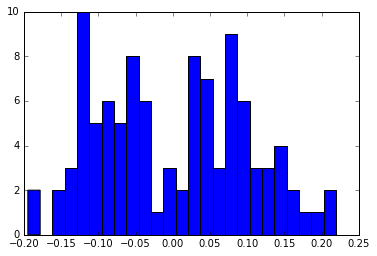

In [304]:
plt.hist(V[:,0], bins = 25)

(0, 200)

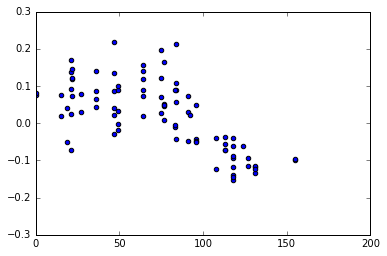

In [322]:
plt.scatter(sampleinfoCEU.elapsedInDays.apply(lambda x: x.days) , V[:,0])
plt.xlim(0,200)